In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Any, Dict, Tuple, Union
from numpy.typing import NDArray
sns.set()

In [2]:
filename = "../../Galaxy10_DECals.h5"

In [3]:
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    print(type(f['images'][:10]))
    

Keys: <KeysViewHDF5 ['ans', 'dec', 'images', 'pxscale', 'ra', 'redshift']>
<class 'numpy.ndarray'>


In [4]:
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    
    ra = f['ra'][()]
    dec = f['dec'][()]
    redshift = f['redshift'][()]
    pxscale = f['pxscale'][()]
    label = f['ans'][()]
    
    images = f['images'][()]
    

Keys: <KeysViewHDF5 ['ans', 'dec', 'images', 'pxscale', 'ra', 'redshift']>


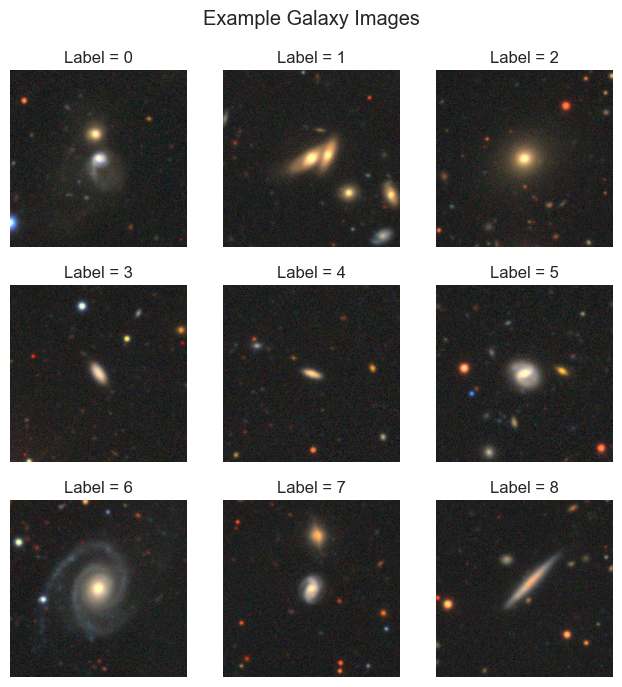

In [5]:
fig = plt.figure(figsize=(7,7))
for i in range(3*3):
    fig.suptitle('Example Galaxy Images')
    ax = fig.add_subplot(3,3, i+1)
    ax.axis('off')
    idx = np.where(label == i)[0][1]
    plt.imshow(images[idx])
    plt.grid(None)
    plt.tight_layout()
    plt.title(f'Label = {label[idx]}')

In [25]:
df = pd.DataFrame({'ra' : ra,
                 'dec' : dec,
                 'redshift' : redshift,
                 'pxscale' : pxscale,
                 'label' : label})

In [26]:
df.head()

,ra,dec,redshift,pxscale,label
0,331.664055,-0.484155,0.081919,0.262,0
1,334.536578,-1.189031,0.115252,0.262,0
2,341.902490,-1.127418,0.109418,0.262,0
3,341.343305,0.658176,0.106816,0.262,0
4,349.189982,0.926543,0.120056,0.262,0


In [30]:
'''import pyarrow as pa
import pyarrow.parquet as pq

table = pa.Table.from_pandas(df)
pq.write_table(table, '../../data/data.parquet')'''

In [25]:
from PIL import Image 
#import PIL

In [33]:
'''print(images.shape)'''

(17736, 256, 256, 3)


In [24]:
'''save_dir = '../../data/images/'
for i in range(images.shape[0]):
    IMAGE_arr = images[i,:,:,:]
    x = Image.fromarray(IMAGE_arr)
    x.save(f"{save_dir}/{i}.jpg")'''

In [10]:
from scipy.ndimage import rotate

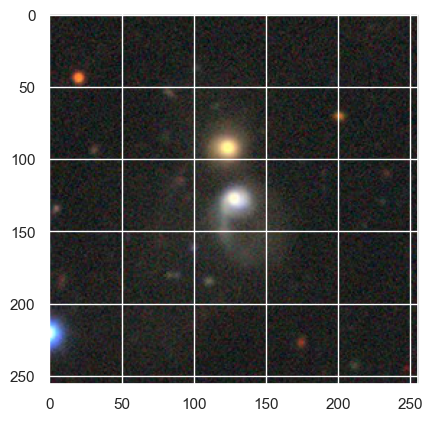

In [41]:
image = images[1]
plt.imshow(image)

In [126]:
def rotate_and_flip(images : NDArray, angle : int,  flip : bool = True)-> NDArray:
    rotate_angle_str = 'rotate_' + str(angle)
   
    rotated = rotate(images,angle,axes=(1,2))
    if flip:
        rotated = np.fliplr(rotated)
    return rotated

In [127]:
def save_in_h5py(f, images,labels):
    dataset = f.create_dataset(
        "images", np.shape(images), data=images, compression='gzip', chunks=True)
    meta_set = f.create_dataset(
        "labels", np.shape(labels), data=labels,  compression='gzip', chunks=True)

In [101]:

r = rotate_and_flip(images,0,flip=False)


(17736, 256, 256, 3)


In [105]:
f = h5py.File('../../data/augmented_data.hdf5','w')
sub_group = f.create_group('rotated_90')
save_in_h5py(sub_group,r,label)
f.close()

In [128]:
angles = [20,40,60,80,100,120,140,160,180]

for angle in angles:
    for b in [True,False]:
        if b:
            sub_group_str = f'rotated_{angle}_fliped'
        else:
            sub_group_str = f'rotated_{angle}'
        f = h5py.File(f'../../data/{sub_group_str}.hdf5','w')
        r = rotate_and_flip(images,angle,flip=b)
        save_in_h5py(f,r,label)
        f.close()


In [6]:
random_angles = np.random.default_rng(42).uniform(0.0,360.0,len(images))


In [26]:
def random_rotations(images : NDArray) -> NDArray:
    rotated = np.zeros_like(images)
    for i in range(len(images)):
        r = rotate(images[i,:,:,:],random_angles[i],axes=(0,1),reshape=False)
        rotated[i,:,:,:] = r
        
        
    return rotated

In [27]:
rotated = random_rotations(images)

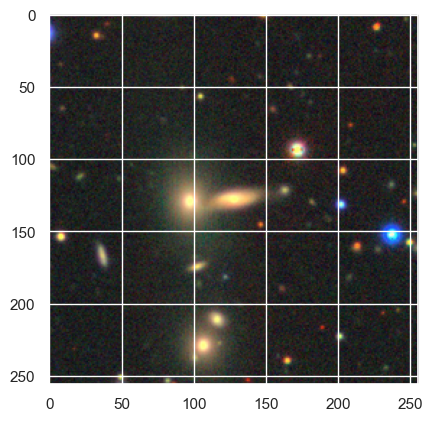

In [29]:
plt.imshow(images[2344,:,:,:])

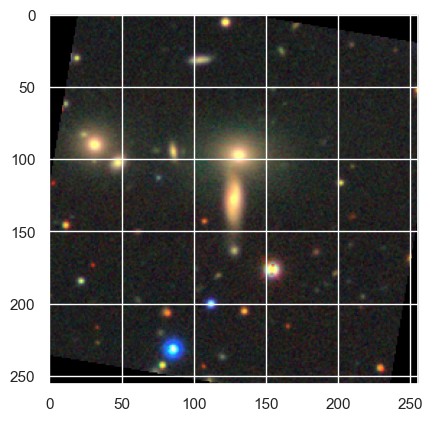

In [30]:
plt.imshow(rotated[2344,:,:,:])

In [31]:
def save_in_h5py_with_angles(f, images,labels,angles):
    dataset = f.create_dataset(
        "images", np.shape(images), data=images, compression='gzip', chunks=True)
    labels = f.create_dataset(
        "labels", np.shape(labels), data=labels,  compression='gzip', chunks=True)
    angles = f.create_dataset(
        "angles", np.shape(angles), data=angles,  compression='gzip', chunks=True)
    

In [32]:
f = h5py.File(f'../../data/random_rotations.hdf5','w')
save_in_h5py_with_angles(f,rotated,label,random_angles)
f.close()

In [33]:
with h5py.File('../../data/random_rotations.hdf5', "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]
    
   
    label = f['labels'][()]
    
    images = f['images'][()]
    rotations_angles = f['angles'][()]

Keys: <KeysViewHDF5 ['angles', 'images', 'labels']>


In [ ]:
print(rotations_angles[1234])
print(label
plt.imshow(images[1234,:,:,:])